In [1]:
# Importing required modules.
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import plotly.plotly as py
from plotly.graph_objs import *

In [2]:
data = pd.read_csv("train.csv")
print data.head()

   TripType  VisitNumber Weekday           Upc  ScanCount  \
0       999            5  Friday  6.811315e+10         -1   
1        30            7  Friday  6.053882e+10          1   
2        30            7  Friday  7.410811e+09          1   
3        26            8  Friday  2.238404e+09          2   
4        26            8  Friday  2.006614e+09          2   

   DepartmentDescription  FinelineNumber  
0     FINANCIAL SERVICES          1000.0  
1                  SHOES          8931.0  
2          PERSONAL CARE          4504.0  
3  PAINT AND ACCESSORIES          3565.0  
4  PAINT AND ACCESSORIES          1017.0  


In [3]:
# Cleaning data
data.count()

TripType                 647054
VisitNumber              647054
Weekday                  647054
Upc                      642925
ScanCount                647054
DepartmentDescription    645693
FinelineNumber           642925
dtype: int64

There are some missing values as seen for UPC, ScanCount, DepartmentDescription, FinelineNumber. Considering that our data set in huge, it is prudent to drop these missing values

In [4]:
data = data.dropna()
data.count()

TripType                 642925
VisitNumber              642925
Weekday                  642925
Upc                      642925
ScanCount                642925
DepartmentDescription    642925
FinelineNumber           642925
dtype: int64

After dropping NA values, we are left with 642925 of data points.

TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
VisitNumber - an id corresponding to a single trip by a single customer
Weekday - the weekday of the trip
Upc - the UPC number of the product purchased
ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
DepartmentDescription - a high-level description of the item's department
FinelineNumber - a more refined category for each of the products, created by Walmart

[999  30  26   8  35  41  21   6  42   7   9  39  25  38  15  36  20  37
  32  40   5   3   4  24  33  43  31  27  34  18  29  44  19  23  22  28
  14  12]


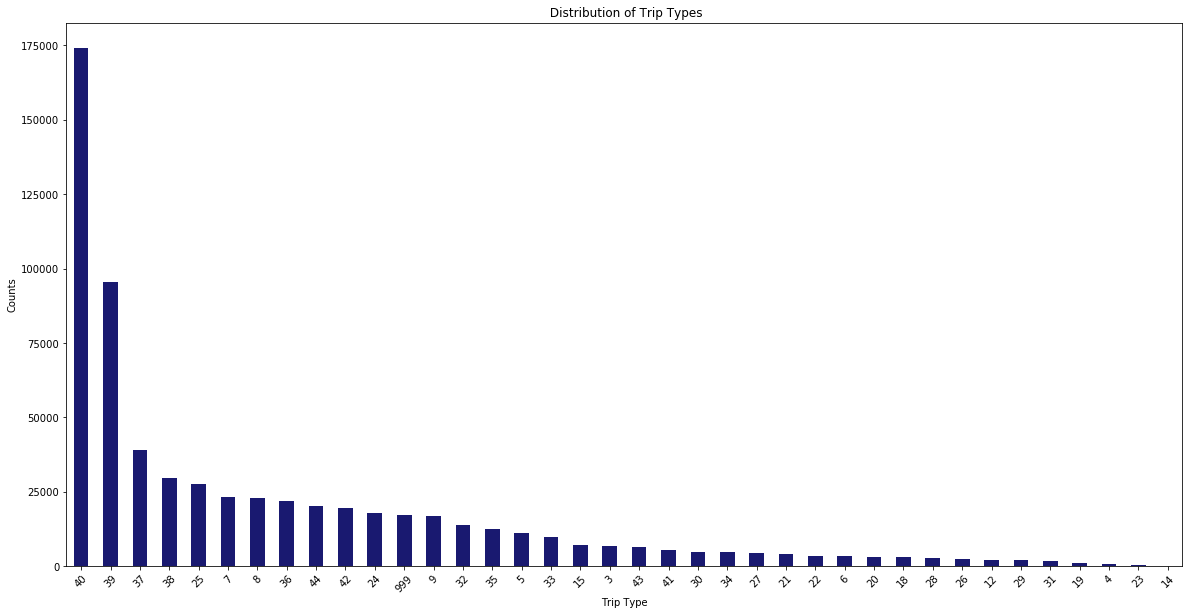

In [5]:
# Trip Types : Different IDs.
print data.TripType.unique()
ax = data.TripType.value_counts().plot(kind="bar", rot=45, title=" Distribution of Trip Types", color="midnightblue", figsize=(20,10))
ax.set_xlabel("Trip Type")
ax.set_ylabel("Counts")

The Departments in Walamrt include the following:
['FINANCIAL SERVICES' 'SHOES' 'PERSONAL CARE' 'PAINT AND ACCESSORIES'
 'DSD GROCERY' 'MEAT - FRESH & FROZEN' 'DAIRY' 'PETS AND SUPPLIES'
 'HOUSEHOLD CHEMICALS/SUPP' 'IMPULSE MERCHANDISE' 'PRODUCE'
 'CANDY, TOBACCO, COOKIES' 'GROCERY DRY GOODS' 'BOYS WEAR'
 'FABRICS AND CRAFTS' 'JEWELRY AND SUNGLASSES' 'MENS WEAR' 'ACCESSORIES'
 'HOME MANAGEMENT' 'FROZEN FOODS' 'SERVICE DELI'
 'INFANT CONSUMABLE HARDLINES' 'PRE PACKED DELI' 'COOK AND DINE'
 'PHARMACY OTC' 'LADIESWEAR' 'COMM BREAD' 'BAKERY' 'HOUSEHOLD PAPER GOODS'
 'CELEBRATION' 'HARDWARE' 'BEAUTY' 'AUTOMOTIVE' 'BOOKS AND MAGAZINES'
 'SEAFOOD' 'OFFICE SUPPLIES' 'LAWN AND GARDEN' 'SHEER HOSIERY' 'WIRELESS'
 'BEDDING' 'BATH AND SHOWER' 'HORTICULTURE AND ACCESS' 'HOME DECOR' 'TOYS'
 'INFANT APPAREL' 'LADIES SOCKS' 'PLUS AND MATERNITY' 'ELECTRONICS'
 'GIRLS WEAR, 4-6X  AND 7-14' 'BRAS & SHAPEWEAR' 'LIQUOR,WINE,BEER'
 'SLEEPWEAR/FOUNDATIONS' 'CAMERAS AND SUPPLIES' 'SPORTING GOODS'
 'PLAYERS AN

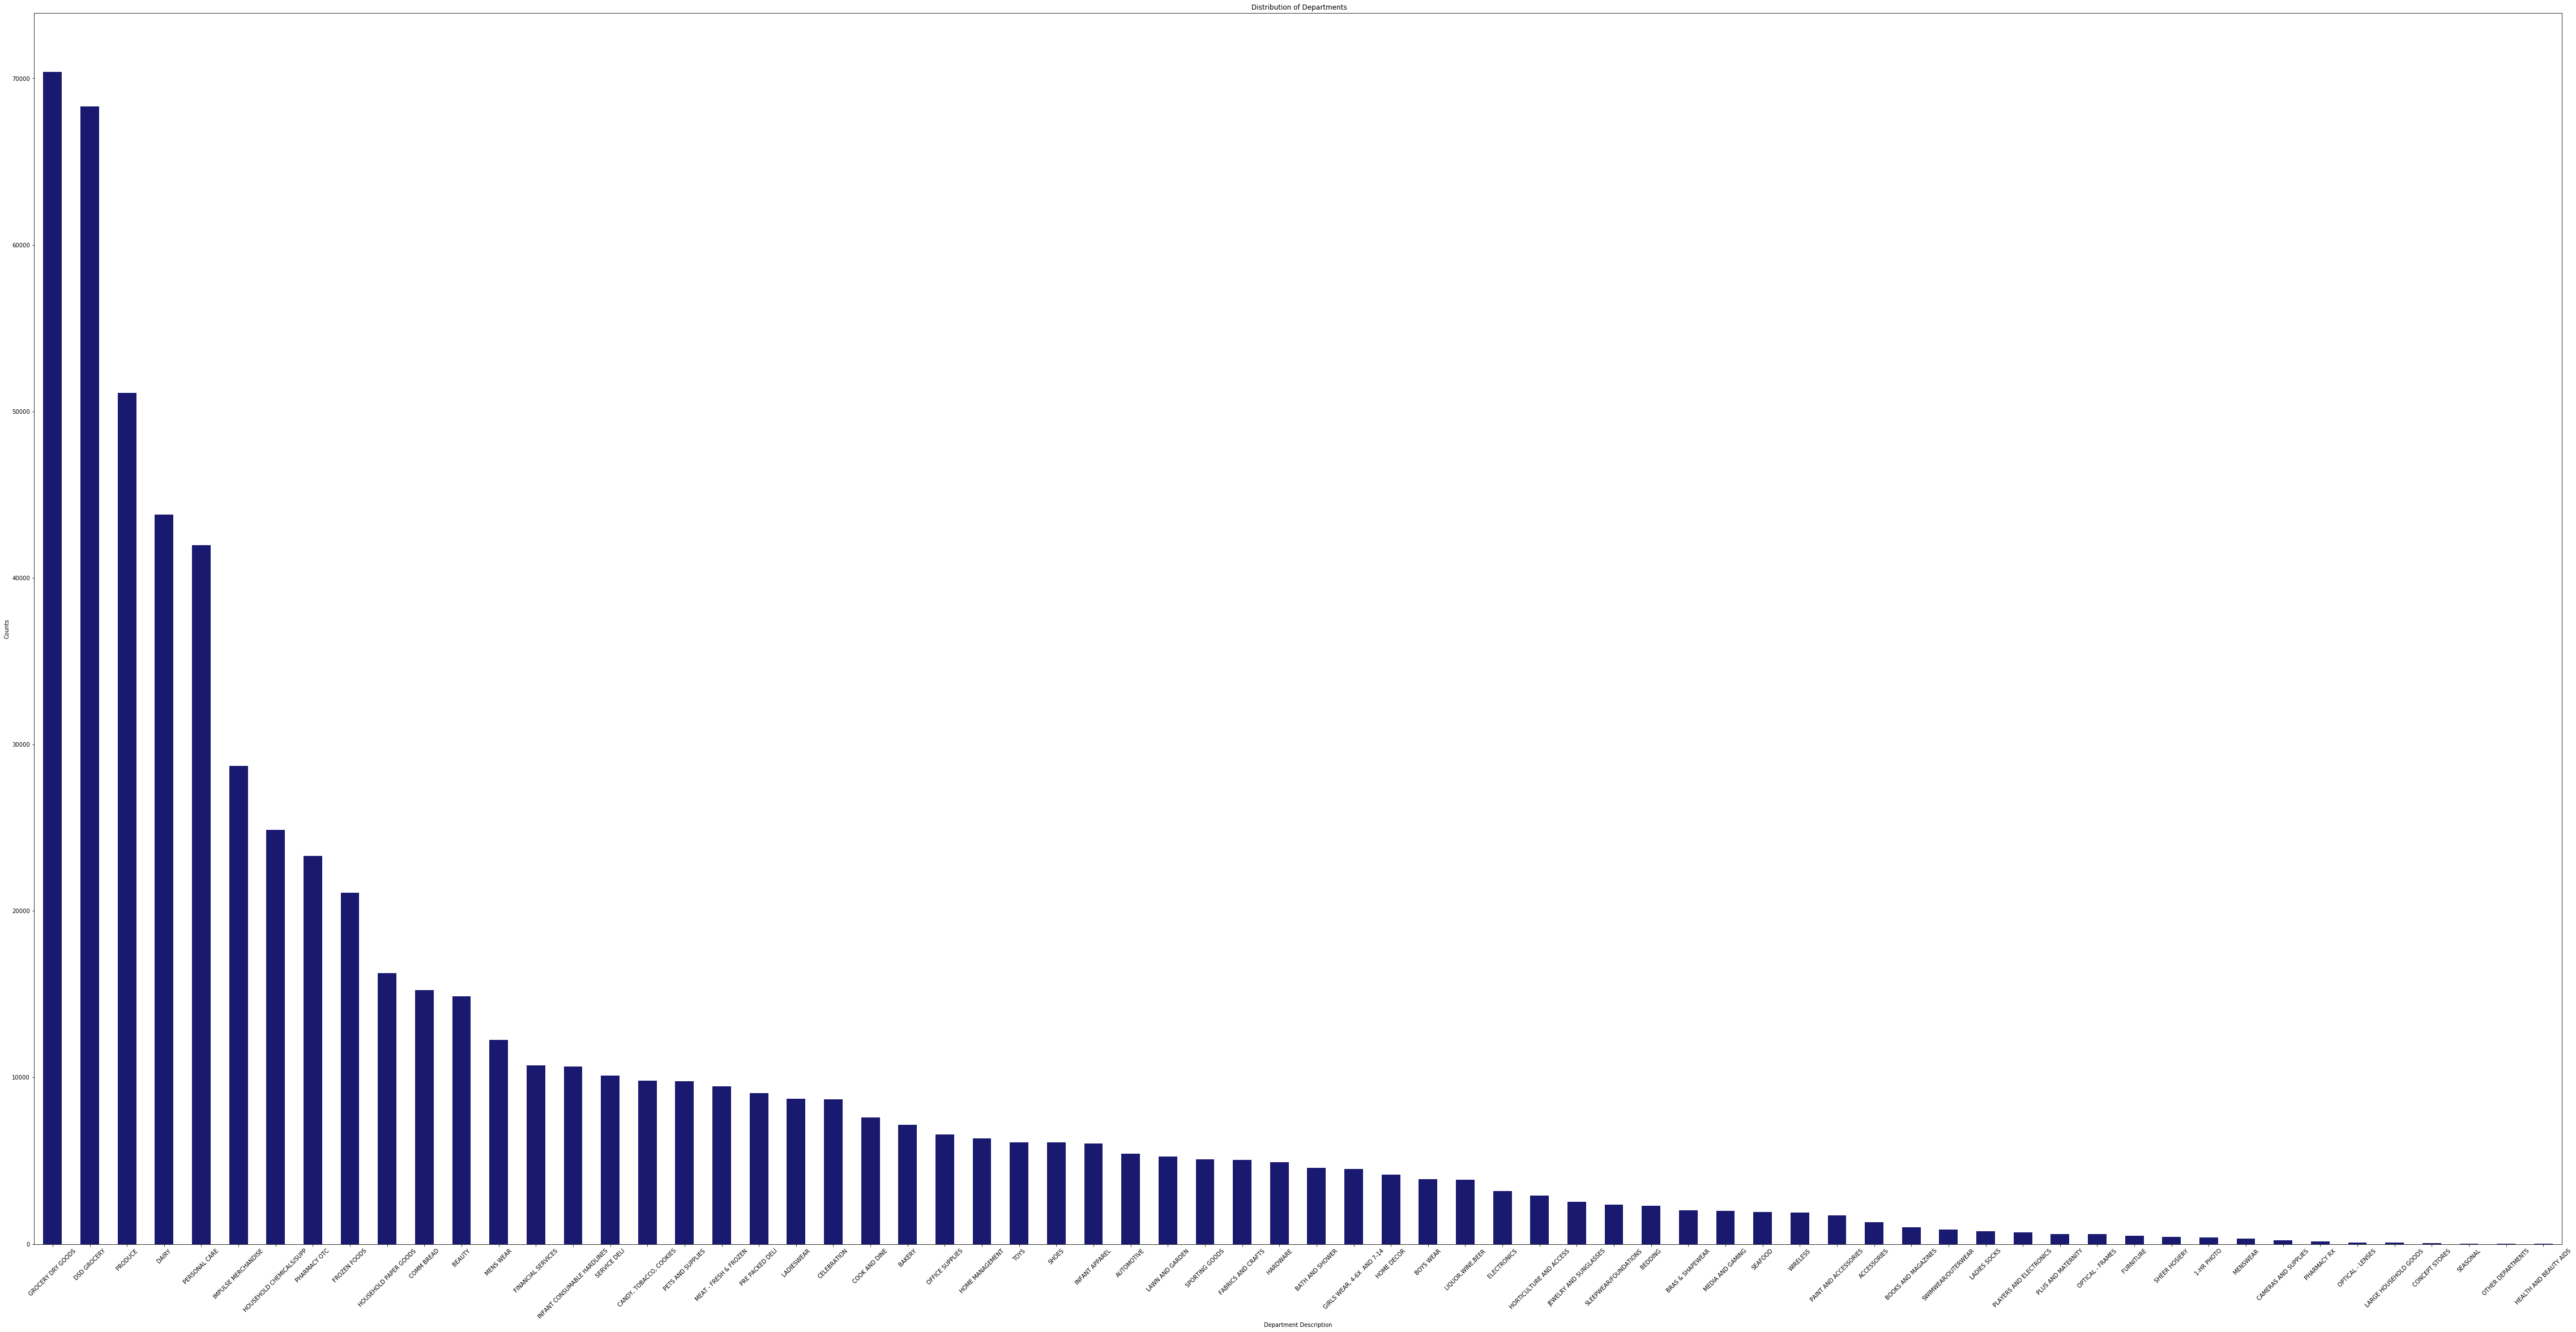

In [6]:
# Department Descriptions
print "The Departments in Walamrt include the following:"
print data.DepartmentDescription.unique()
# Numbe of departments
print str(data.DepartmentDescription.unique().size) + " nos of Departments"

ax = data.DepartmentDescription.value_counts().plot(kind="bar", rot=45, title=" Distribution of Departments", color="midnightblue", figsize=(80,40))
ax.set_xlabel("Department Description")
ax.set_ylabel("Counts")

A good distribution is avaliable showing the distribution of things people buys. A good indicator of the effectiveness to segement people and the trip types based on the department visits.

In [7]:
# Visit Number
print "Visit Numbers in Walmart data set include the following:"
print data.VisitNumber.unique()
# Numbe of departments
print str(data.VisitNumber.unique().size) + "no of unique Visits"
data

Visit Numbers in Walmart data set include the following:
[     5      7      8 ..., 191345 191346 191347]
94247no of unique Visits


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,Friday,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,Friday,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0
8,26,8,Friday,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0


Unique Visit Numbers- Thus out 642925, 94247nos. are unique visits. Also, it looks like each uniue visit has only one trip type. During feature engineering, it may make sense to group the visit numbers together.

The Weekdays include the following:
['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']
7 nos of Weekdays


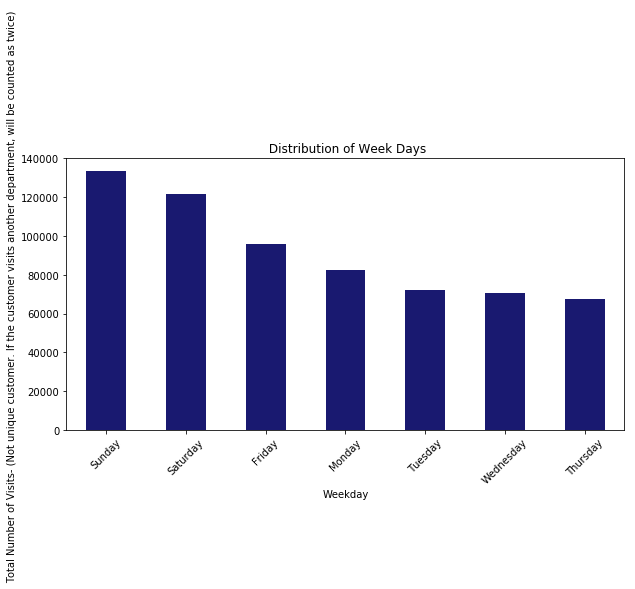

In [8]:
# WeekDay
print "The Weekdays include the following:"
print data.Weekday.unique()
# Numbe of weekdays
print str(data.Weekday.unique().size) + " nos of Weekdays"

ax = data.Weekday.value_counts().plot(kind="bar", rot=45, title=" Distribution of Week Days", color="midnightblue", figsize=(10,5))
ax.set_xlabel("Weekday")
ax.set_ylabel("Total Number of Visits- (Not unique customer. If the customer visits another department, will be counted as twice) ")

As expected much of the sales happens on weekends. Not unique customer. If the customer visits another department, will be counted as twice. After groupby, later plot distribution. Also, weekdays to be converted into factor/dummy variables.and check for correlation between dummy variable and weekday.

In [9]:
# UPC
print "The UPCs include the following:"
print data.Upc.unique()
# Numbe of weekdays
print str(data.Upc.unique().size) + " nos of Upcs"

The UPCs include the following:
[  6.81131529e+10   6.05388160e+10   7.41081110e+09 ...,   8.85306278e+10
   8.87439527e+10   5.44000008e+09]
97714 nos of Upcs


Lot number of UPCs - 97714!!!!

The Scan counts include the following:
[ -1   1   2   3   5   6   4  14  -2   9   7  10   8  -3  -5  11  16  -4
  13  15  30  12  20  -6 -12  19  46  23  -7  22  25  24  31  -9  51  17
  18  71 -10]
39 number of ScanCounts


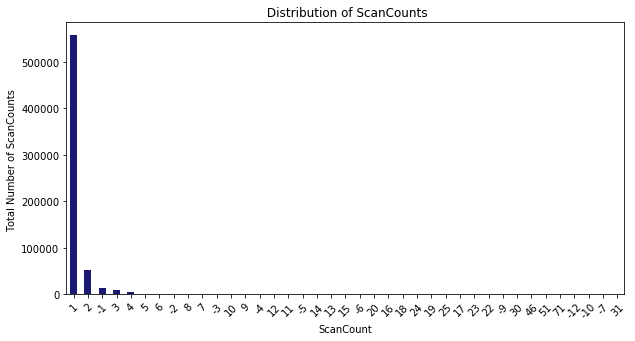

In [10]:
# Scan Counts
print "The Scan counts include the following:"
print data.ScanCount.unique()
# Number of Scan Counts
print str(data.ScanCount.unique().size) + " number of ScanCounts"
ax = data.ScanCount.value_counts().plot(kind="bar", rot=45, title=" Distribution of ScanCounts", color="midnightblue", figsize=(10,5))
ax.set_xlabel("ScanCount")
ax.set_ylabel("Total Number of ScanCounts ")

Scan count: Negative numbers indicate returns.

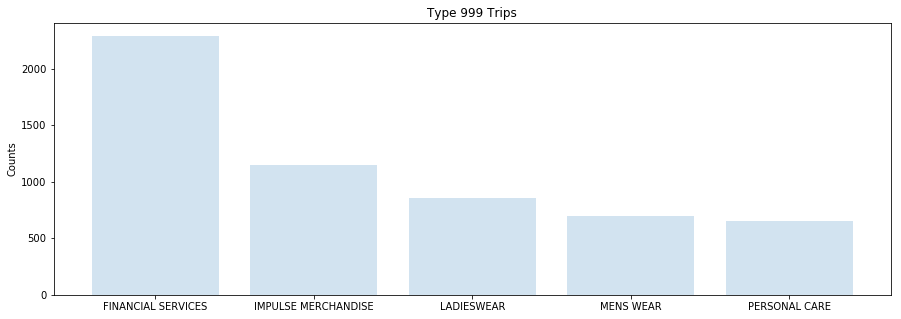

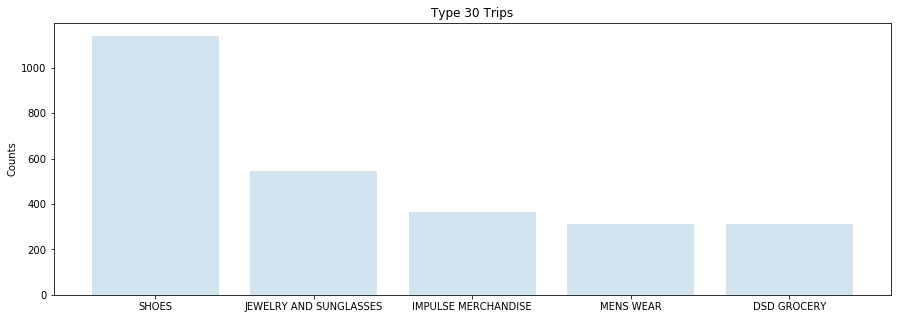

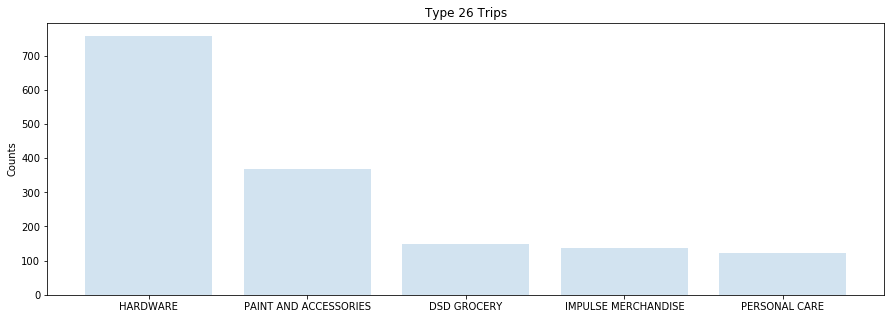

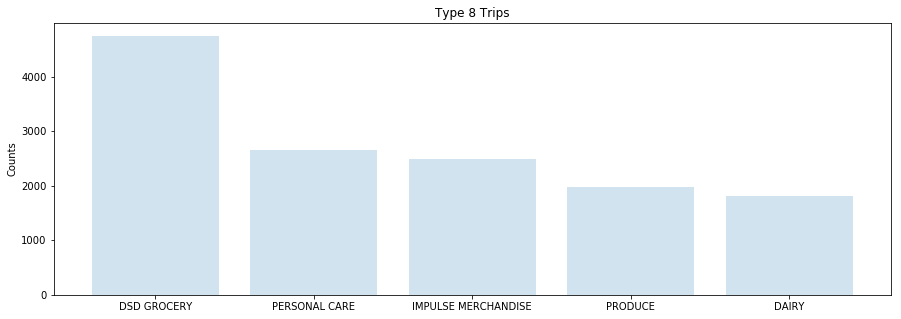

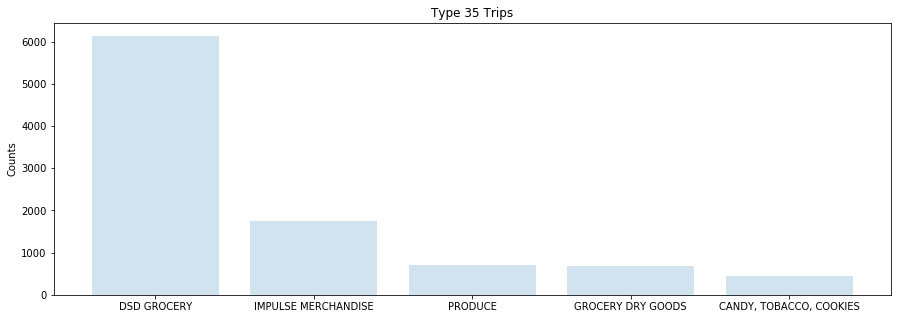

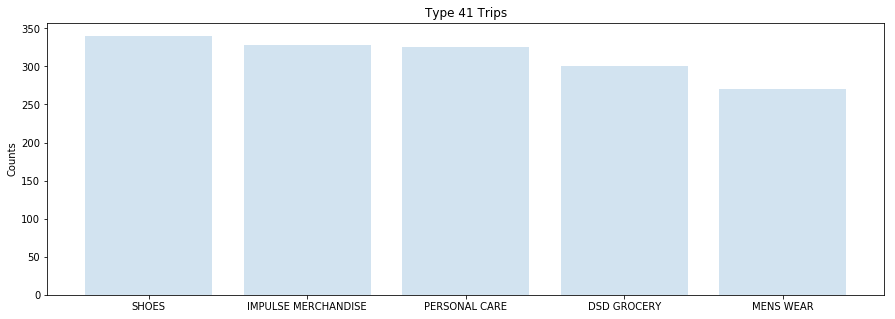

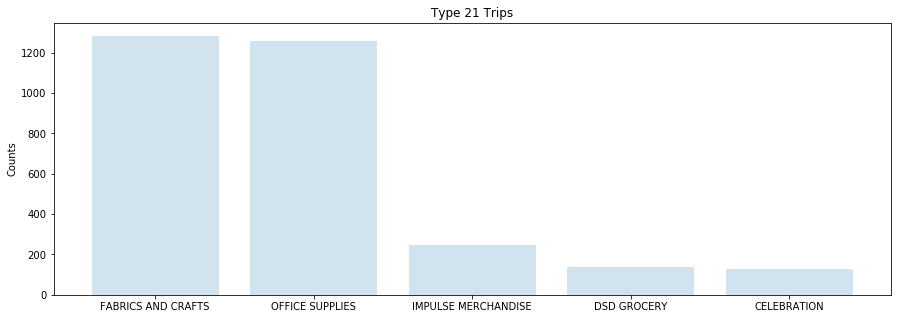

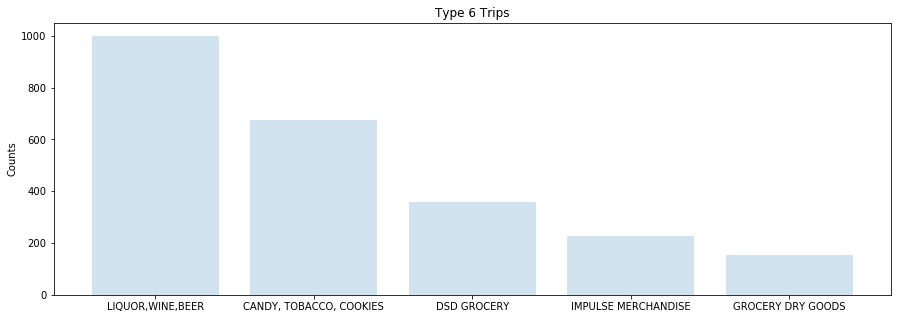

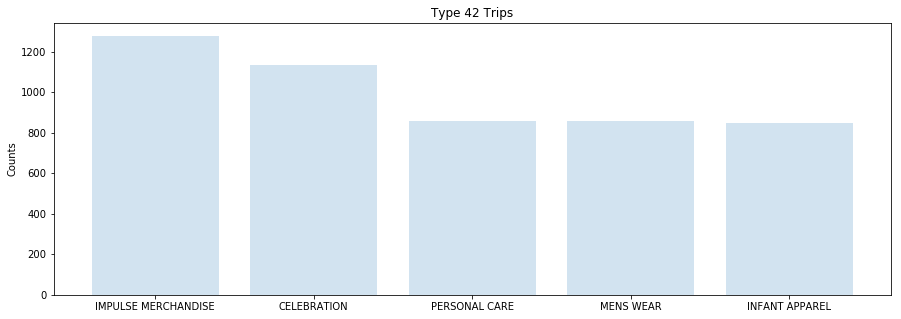

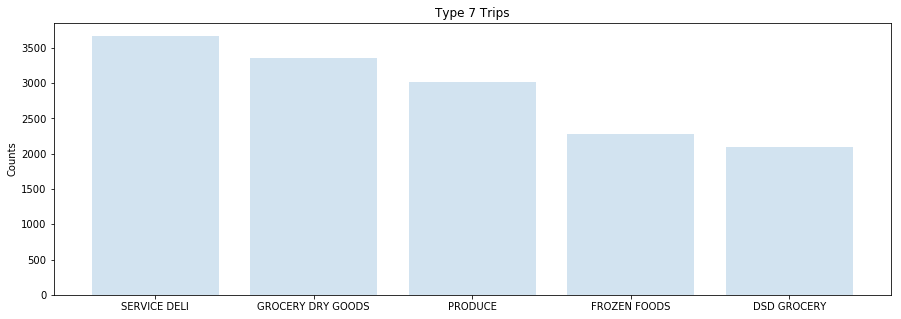

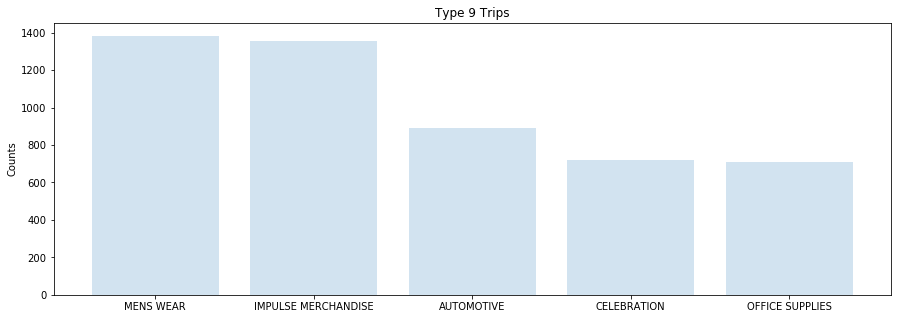

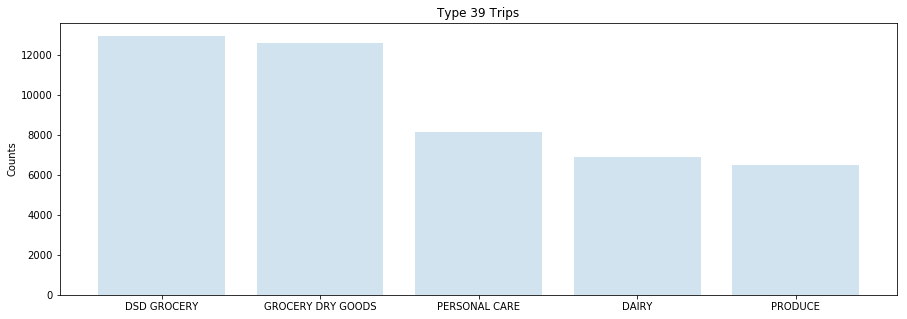

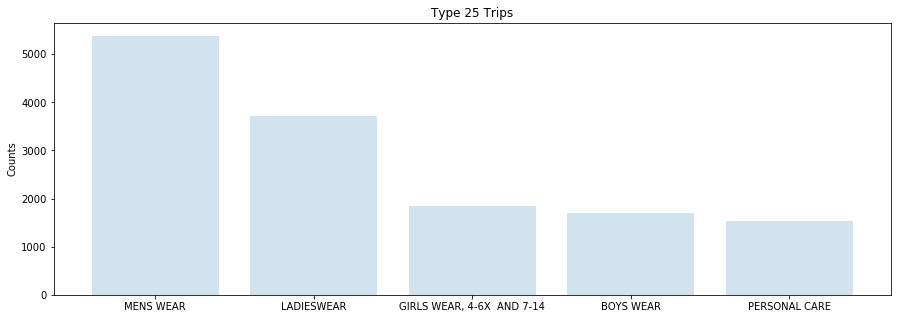

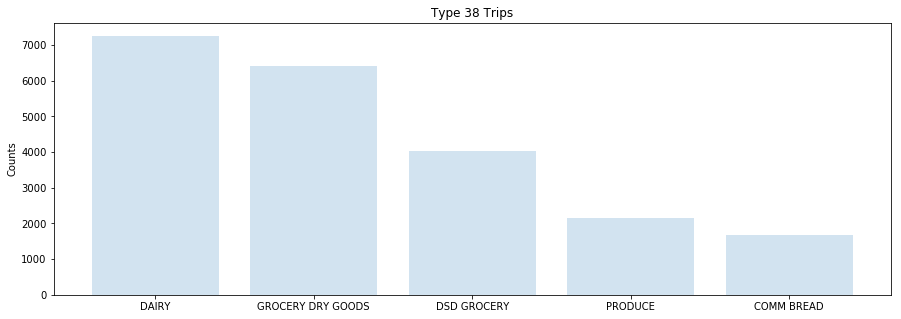

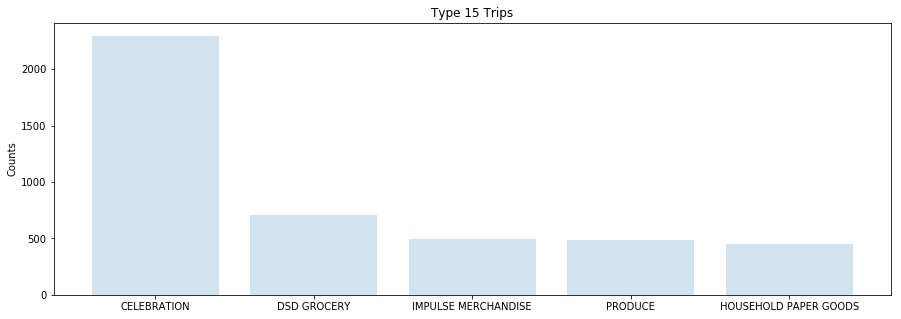

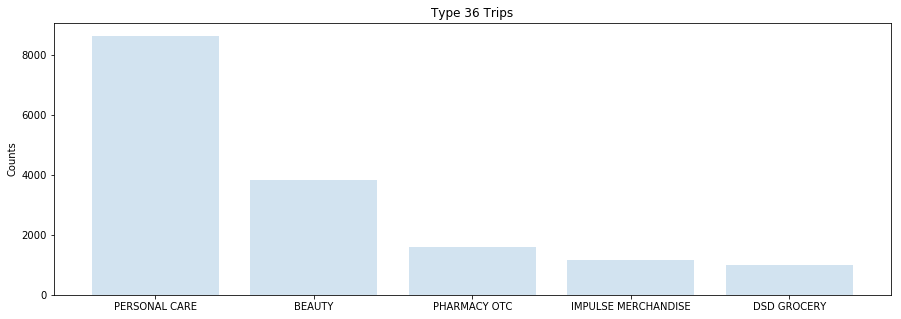

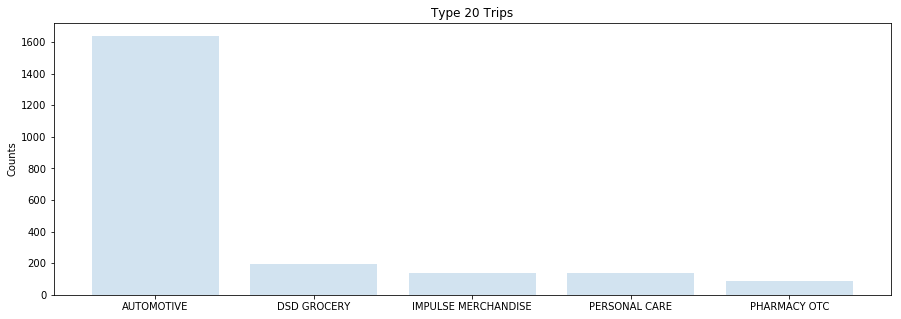

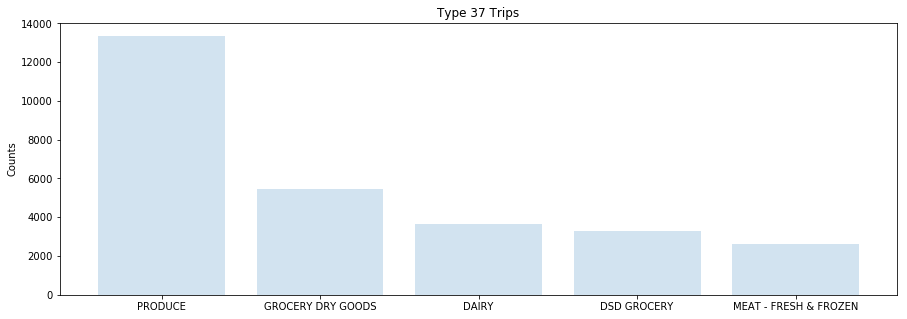

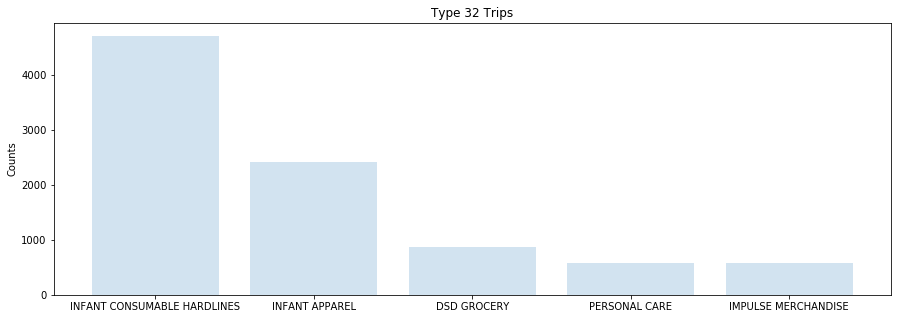

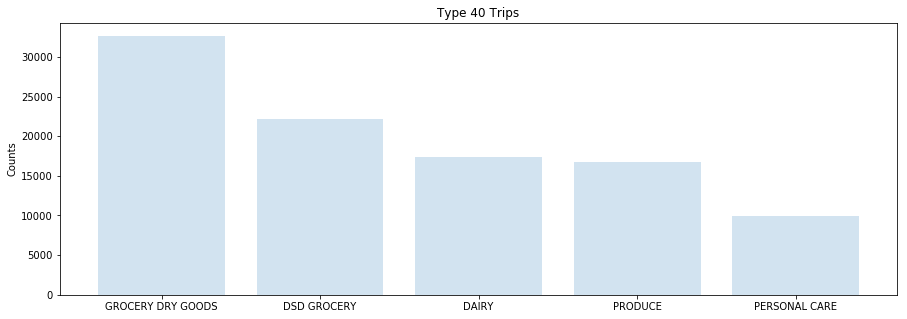

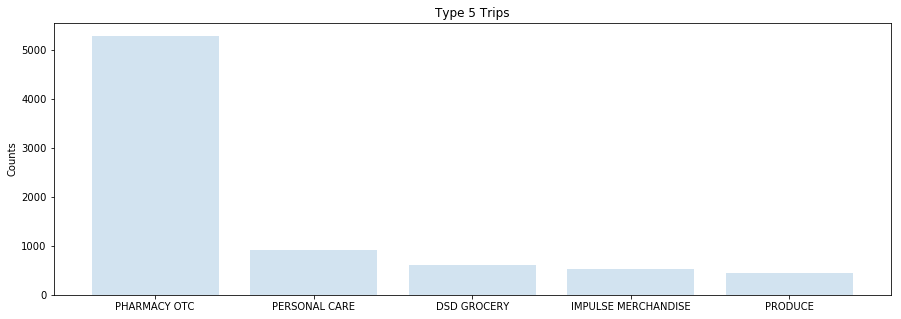

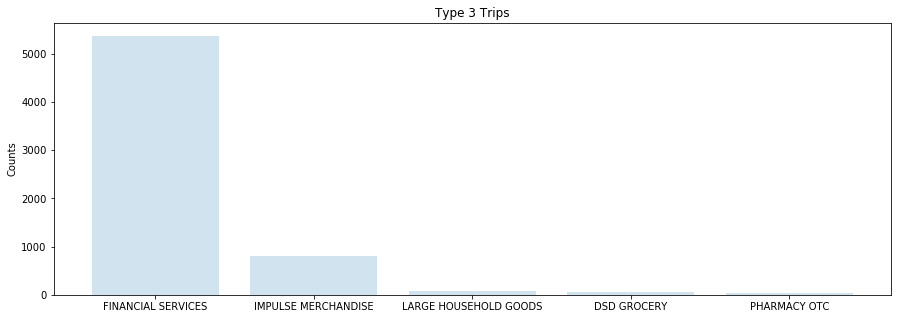

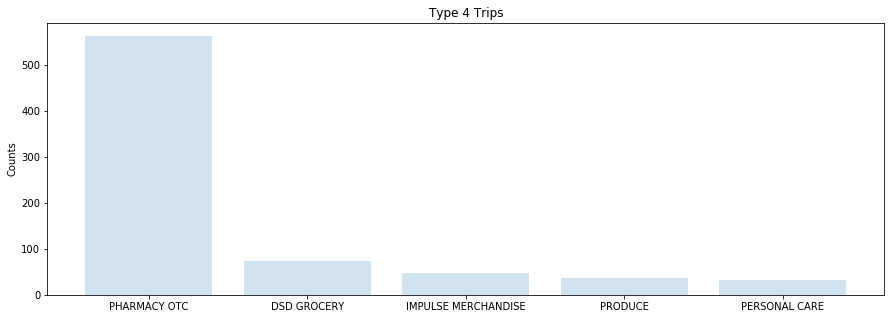

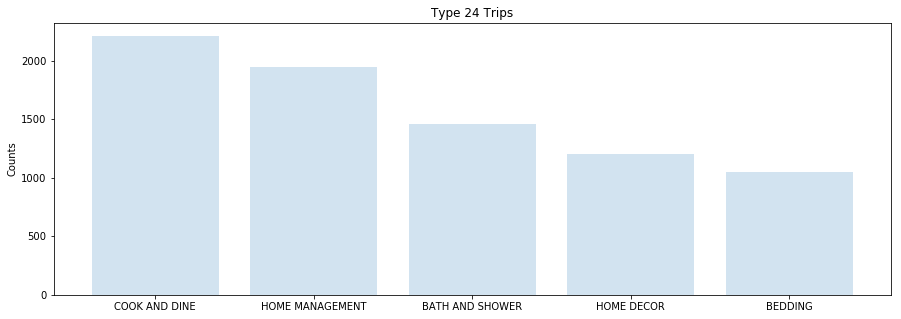

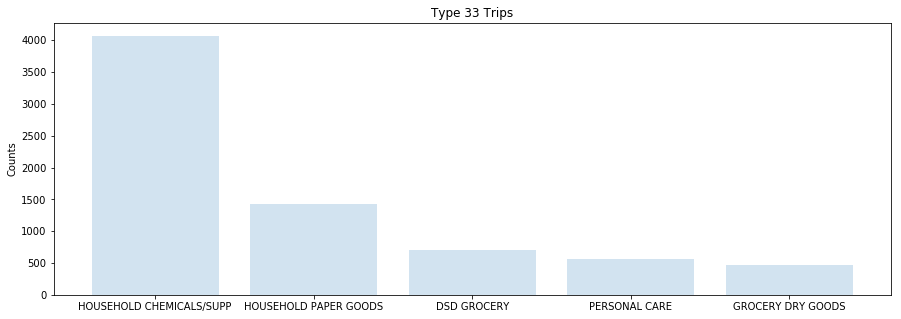

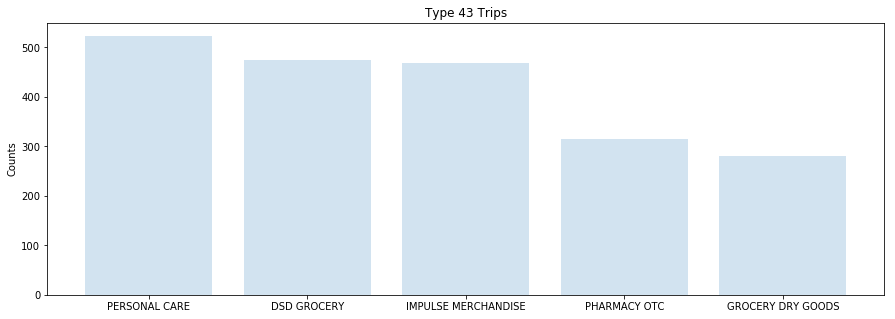

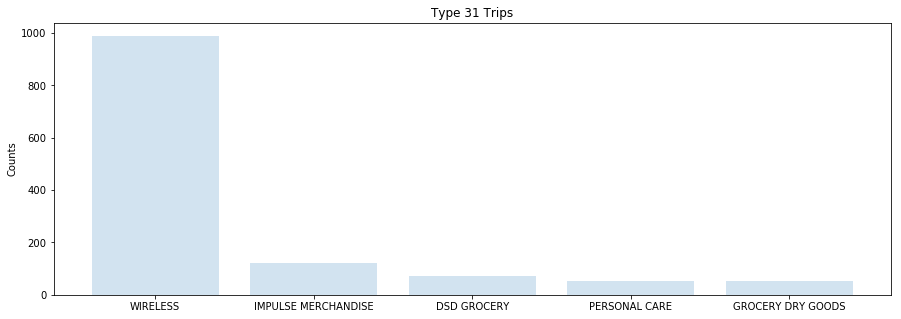

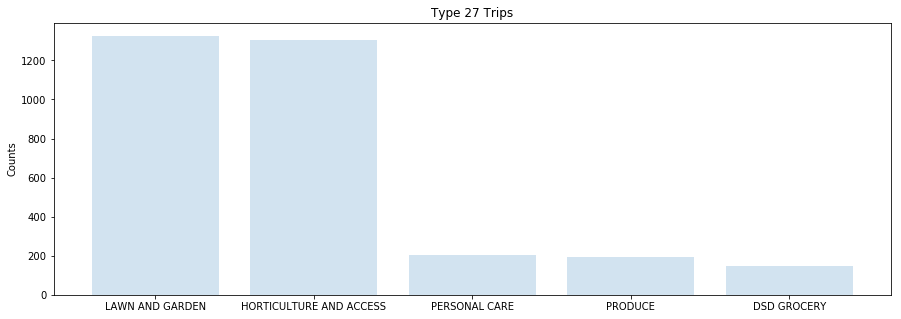

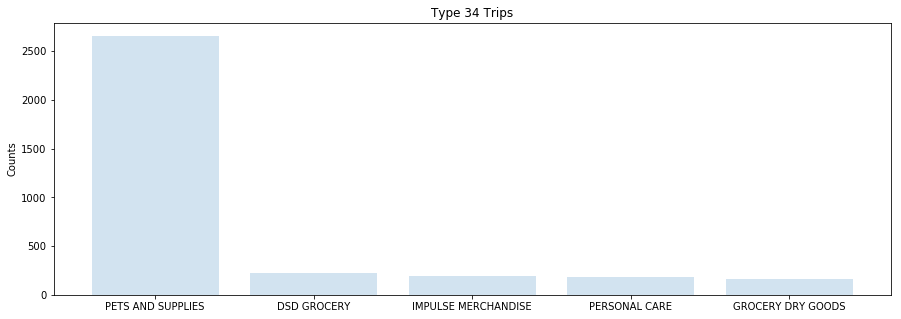

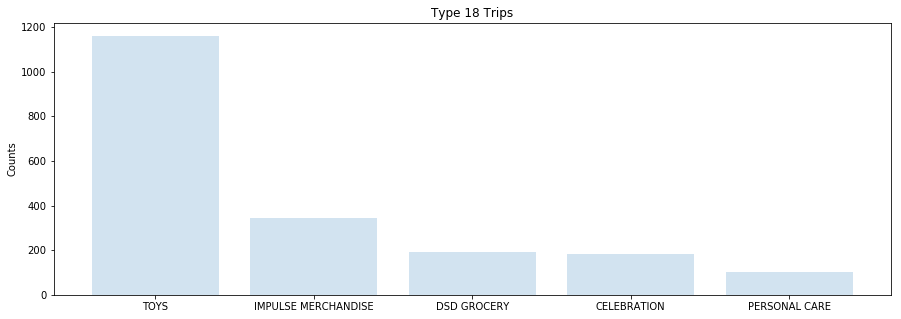

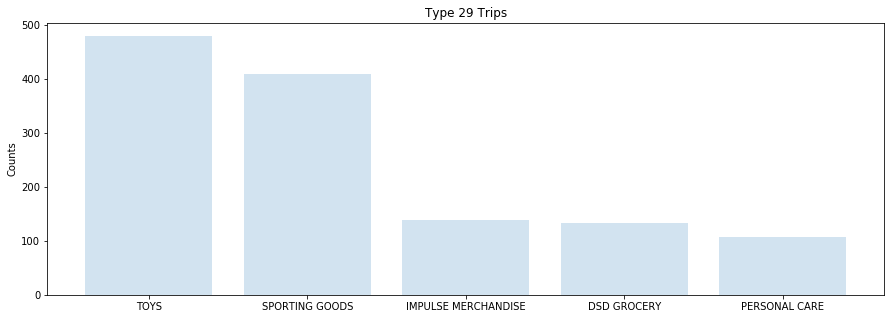

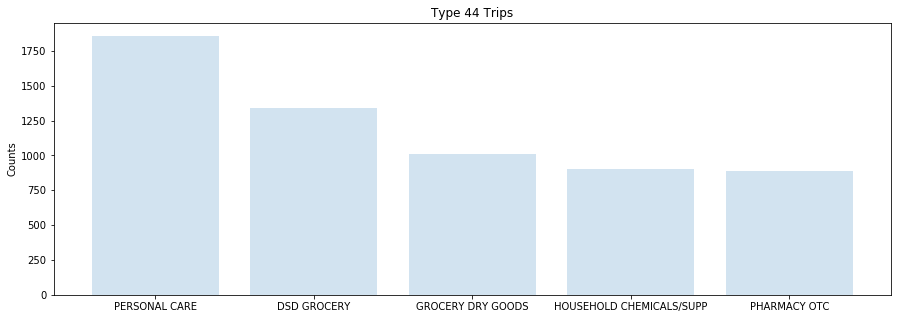

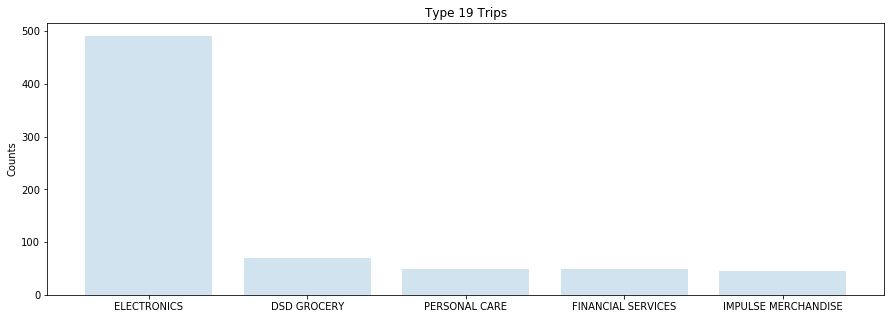

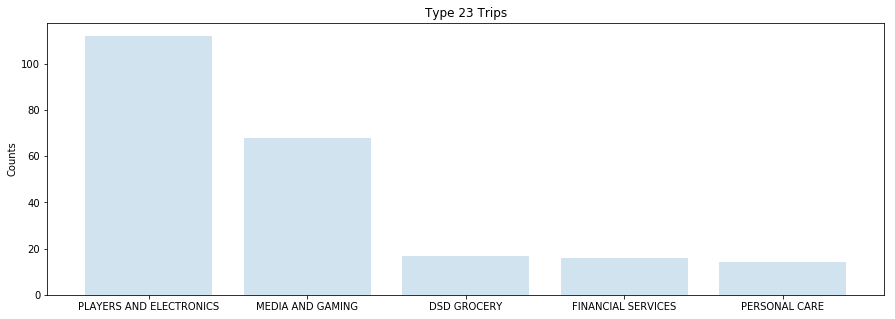

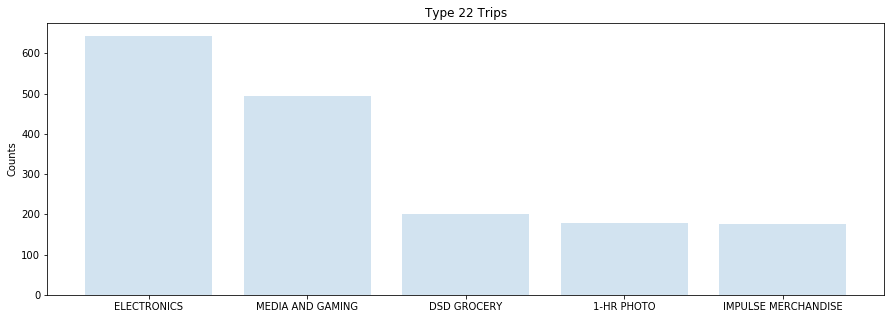

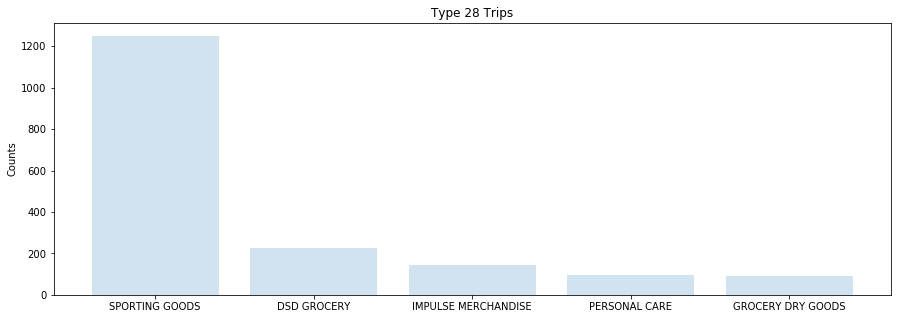

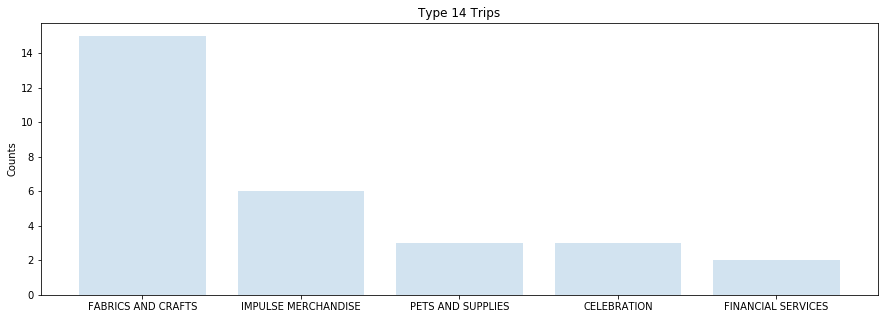

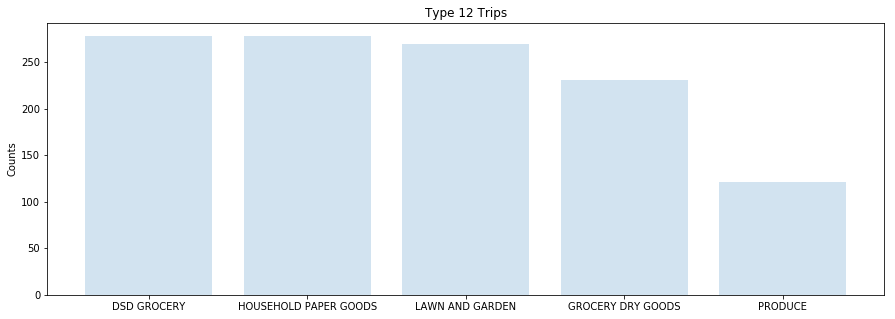

In [11]:
# Understanding the trip types - aka the dependant variable- its relation to Department Description

def investigate_trip(TT) :
    type_TT = data[data.TripType == TT]
    type_TT_items = type_TT[["TripType","DepartmentDescription"]]
    return type_TT_items.DepartmentDescription.value_counts().head()

for k in data.TripType.unique():
    trip_k = investigate_trip(k)
    lis = trip_k.axes
    objects= lis[0].values
    y_pos = np.arange(len(objects))
    plt.figure(figsize=(15,5))
    fig = plt.bar(y_pos, trip_k.values, align='center', alpha=0.2)

    plt.xticks(y_pos, objects)
    plt.ylabel('Counts')
    title_TT = "Type " + str(k) + " Trips"
    plt.title(title_TT)
    plt.show()


The different kind of trip can be inferred from the Department Description variable- whether a customer bought a product in a particular department and how much they bought. Hence it would benefit to convert the  Depeartment Description variable into different factor variables duing feature engineering.

In [12]:
# Transforming weekday into numbers.
data = data.replace("Monday", 1)
data = data.replace("Tuesday", 2)
data = data.replace("Wednesday", 3)
data = data.replace("Thursday", 4)
data = data.replace("Friday", 5)
data = data.replace("Saturday", 6)
data = data.replace("Sunday", 7)

In [13]:
data

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,5,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,5,6.053882e+10,1,SHOES,8931.0
2,30,7,5,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,5,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,5,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,5,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,5,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,5,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0
8,26,8,5,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0
9,26,8,5,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0


In [17]:
dum = pd.get_dummies(data.DepartmentDescription)
data[dum.columns] = dum
data

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,999,5,5,6.811315e+10,-1,FINANCIAL SERVICES,1000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,7,5,6.053882e+10,1,SHOES,8931.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,30,7,5,7.410811e+09,1,PERSONAL CARE,4504.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,8,5,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26,8,5,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,26,8,5,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,26,8,5,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,26,8,5,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,26,8,5,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,26,8,5,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
descriptionDummies = data.iloc[:,7:]
descriptionDummies

,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
descriptionDummies = descriptionDummies.apply(lambda x: x*data["ScanCount"])
% Confirming whether scancount has been applied
descriptionDummies

ERROR:root:Line magic function `%Confirming` not found.


,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data.loc[data.ScanCount < 0, 'Return'] = 1
data.loc[data.Return != 1, 'Return'] = 0

In [40]:
data = data[["TripType", "VisitNumber", "Weekday", "ScanCount", "Return"]]
data.describe()

,TripType,VisitNumber,Weekday,ScanCount,Return
count,642925.000000,642925.000000,642925.000000,642925.000000,642925.000000
mean,58.337228,96199.870353,4.430377,1.110203,0.023654
std,156.559892,55552.836758,2.073576,0.701240,0.151970
min,3.000000,5.000000,1.000000,-12.000000,0.000000
25%,27.000000,49300.000000,3.000000,1.000000,0.000000
50%,39.000000,97116.000000,5.000000,1.000000,0.000000
75%,40.000000,144353.000000,6.000000,1.000000,0.000000
max,999.000000,191347.000000,7.000000,71.000000,1.000000


In [41]:
dataPart1 = data.groupby("VisitNumber").agg({'Weekday': np.max, "TripType": np.max, 'ScanCount': np.sum, 'Return': np.max})
dataPart1

,TripType,Return,Weekday,ScanCount
VisitNumber,,,,
5,999,1.0,5,-1
7,30,0.0,5,2
8,26,1.0,5,27
9,8,0.0,5,3
10,8,0.0,5,3
11,35,0.0,5,4
12,41,0.0,5,7
15,21,0.0,5,9
17,6,0.0,5,4


In [56]:
dataPart2 = pd.concat([data.VisitNumber,descriptionDummies],axis=1)
dataPart2 = dataPart2.groupby("VisitNumber").agg('sum')
dataPart2

,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,1,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
data = pd.concat([dataPart1, dataPart2], axis=1)
data

,TripType,Return,Weekday,ScanCount,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
5,999,1.0,5,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,30,0.0,5,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,26,1.0,5,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,8,0.0,5,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,8,0.0,5,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,35,0.0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,41,0.0,5,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
15,21,0.0,5,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,6,0.0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
